
<center> 𝓐𝓷𝓭𝓻𝓮𝓼𝓪 𝓐𝓻𝓪𝓷𝓱𝓪,
𝕭𝓻𝓾𝓷𝓸 𝕵𝓪𝓵𝓵𝓸𝓷,
𝕵𝓻𝓲𝓼 𝓡𝓪𝓺𝓾𝓮𝓵<center>


---


 <center><h1>Análise dos Dados do Airbnb - João Pessoa</h1></center>

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


---


**Neste *notebook*, iremos efetuar o scraping e analisar os dados referentes à cidade de João Pessoa, e ver quais insights podem ser extraídos a partir dessa raspagem de dados brutos e sua análise ⚛.**

---


# Apresentação:
Este trabalho tem como objetivo apresentar uma análise de dados realizada com o intuito de coletar e analisar informações disponibilizadas pelo Airbnb sobre a cidade de João Pessoa. O trabalho foi realizado com o objetivo de ser apresentado como portfólio acadêmico e tem como objetivo principal apresentar as habilidades de coleta e análise de dados adquiridas durante o curso.

A coleta dos dados foi realizada utilizando a biblioteca Beautiful Soup, que permite a raspagem de dados na web. Utilizando esta biblioteca, foi possível coletar informações sobre a localização, características de acomodações, quantidade e tipo de camas, preço por noite, avaliação e quantidade de avaliações de cada acomodação disponível na cidade de João Pessoa.

Após a coleta dos dados, foi realizada uma limpeza dos dados, onde foram removidas as entradas duplicadas e tratadas as entradas faltantes. Além disso, foi necessário converter algumas variáveis para o formato adequado para a realização das análises.

A análise dos dados foi realizada utilizando as bibliotecas pandas e numpy para a manipulação dos dados e as bibliotecas seaborn e matplotlib para a geração de gráficos e visualizações.

Os resultados obtidos através das análises apresentam informações valiosas para aqueles interessados em investir no setor de aluguel de acomodações na cidade de João Pessoa. Foi possível identificar quais são os tipos de acomodações mais caros, quais são as localizações com maior custo benefício e quais são os preços médios praticados na cidade. Além disso, foi possível identificar quais são as acomodações com melhores avaliações e quais são as acomodações com maior quantidade de avaliações.

Este trabalho demonstra a importância da coleta e análise de dados para a tomada de decisão em negócios, bem como o conhecimento adquirido durante o curso de coleta e análise de dados. Ele também serve como um portfólio de habilidades, mostrando a capacidade de coletar, limpar, analisar e interpretar dados para gerar insights valiosos.

# Código da Análise:

Esse código importa as bibliotecas numpy, pandas, plotly.express, re, seaborn e matplotlib.pyplot. O numpy é uma biblioteca de computação científica para Python, o pandas é uma biblioteca para manipulação e análise de dados, o plotly.express é uma biblioteca para criação de gráficos interativos, o re é uma biblioteca para trabalhar com expressões regulares, o seaborn é uma biblioteca para visualização de dados estatísticos e o matplotlib.pyplot é uma biblioteca para criação de gráficos. Essas bibliotecas são amplamente utilizadas na ciência de dados e análise de dados.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import re
import seaborn as sns
import matplotlib.pyplot as plt

Este código está lendo um arquivo csv chamado "dados.csv" e armazenando-o em um DataFrame do pandas. Ele está especificando que deve pular as linhas com problemas ("on_bad_lines='skip'"), usando ";" como delimitador e pulando a primeira linha (skiprows=0). Isso é para ler o arquivo e armazená-lo no formato de DataFrame do pandas, que é uma estrutura de dados de tabela bidimensional que permite trabalhar com dados de forma fácil e rápida.

In [ ]:
# Carregando um conjunto de dados em um DataFrame
df = pd.read_csv('dados.csv', on_bad_lines='skip', delimiter=";", skiprows=0)

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,Local,Tipo,Cama,Preço_por_noite,Avaliação,Quantidade_de_avaliações
0,Apartamento em João Pessoa,Studio a beira-mar em Manaíra,3 camas,"195,00",5,"-5,00"
1,Apartamento em Tambaú,Lindo Flat na orla da praia de Tambaú.,1 cama de casal,"132,00","4,44","-274,00"
2,Apartamento em Manaíra,"Uno Flats 201 - Comodidade, luxo e lazer",2 camas,"188,00","4,89","-244,00"
3,Apartamento em João Pessoa,Apartamento moderno e confortável no Caribessa,1 cama queen,"173,00","4,87","-91,00"
4,Apartamento em Cabo Branco,FLAT confortável à beira-mar da praia Cabo Branco,2 camas,"146,00","4,58","-146,00"


# Dicionário das variáveis

**O dicionário de variáveis do conjunto de dados inclui as seguintes entradas:**

`• Localização (Local):` informação que indica o local onde a acomodação está situada.

`• Tipo de Acomodação (Tipo):` informação que indica as informações gerais de cada imóvel, com suas características.

`• Quantidade e tipo de camas (Cama):` informação que indica qual é o tipo e a quantidade de camas disponíveis na acomodação.

`• Preço por noite (Preço_por_noite):` informação que indica qual é o preço cobrado por noite na acomodação.

`• Avaliação das acomodações (Avaliação):` informação que indica qual é a avaliação dada para a acomodação, sendo uma nota numérica.

`• Quantidade de avaliações (Quantidade_de_avaliações):` informação que indica quantas avaliações foram feitas para a acomodação.

Esse código remove as linhas duplicadas do DataFrame 'df', de forma que cada linha é única. A opção "inplace=True" faz com que as linhas duplicadas sejam removidas do DataFrame original, sem a necessidade de atribuir o resultado à uma nova variável.

In [ ]:
# Removendo linhas duplicadas
df.drop_duplicates(inplace=True)

In [ ]:
# df.shape retorna a forma (shape) do DataFrame. A forma é uma tupla de inteiros que indica o número de linhas e colunas no DataFrame.
df.shape

(169, 6)

# **Tratamento dos dados**

Essa célula faz duas coisas:

Ele substitui os caracteres de vírgula (',') por pontos ('.') na coluna "Preço_por_noite" do DataFrame "df" usando o método "str.replace()" e o atributo "regex" para especificar que a substituição será feita usando expressões regulares. Isso é necessário pois, provavelmente, os valores da coluna "Preço_por_noite" estavam armazenados como strings com vírgulas como separadore.

Ele altera o tipo de dado da coluna "Preço_por_noite" de string para float usando o método "astype()". Isso é necessário pois os valores da coluna "Preço_por_noite" são números e é necessário que eles estejam no tipo correto para serem usados em cálculos matemáticos.

Em resumo, esse código corrige o formato dos valores da coluna "Preço_por_noite" para que eles possam ser tratados como números corretamente.

In [ ]:
df['Preço_por_noite'] = df['Preço_por_noite'].astype(str).str.replace(',','.', regex=True)
df['Preço_por_noite'] = df['Preço_por_noite'].astype(float)

Este código é usado para transformar a coluna "Avaliação" em um tipo de dados numérico. Ele faz isso em três etapas:

Substitui o valor "Novo" na coluna por "0" usando o método str.replace()
Substitui as vírgulas por pontos na coluna usando o método str.replace()
Transforma a coluna em float usando o método astype()
Assim, a coluna "Avaliação" é transformada de uma string para um tipo de dados numérico (float), o que permite a realização de operações matemáticas nessa coluna.

In [ ]:
df['Avaliação'] = df['Avaliação'].astype(str).str.replace('Novo','0', regex=True)
df['Avaliação'] = df['Avaliação'].astype(str).str.replace(',','.', regex=True)
df['Avaliação'] = df['Avaliação'].astype(float)

Esse código faz a extração dos valores numéricos presentes na coluna "Cama" do DataFrame "df" e os transforma em inteiros. Ele faz isso através de três passos:

1. Utiliza o método .astype(str) para converter a coluna "Cama" para tipo string;

2. Utiliza o método .str.extract('(\d+)') para extrair somente os valores numéricos presentes na coluna. Isso é feito utilizando uma expressão regular que busca um ou mais dígitos (\d+) presentes na string;

3. Utiliza o método .astype(int) para converter os valores extraídos para o tipo inteiro.

Essas três linhas de código juntas fazem a extração de valores numéricos da coluna "Cama" e convertem-os para inteiros.

In [ ]:
df['Cama'] = df['Cama'].astype(str).str.extract('(\d+)').astype(int)

Esse código substitui os valores nulos (NaN) da coluna 'Quantidade_de_avaliações' do DataFrame 'df' pelo valor 0. O método fillna() é usado para preencher valores nulos com o valor desejado. O parâmetro "inplace=True" indica que a alteração deve ser feita diretamente no DataFrame e não em uma cópia dele.

In [ ]:
df['Quantidade_de_avaliações'].fillna(value=0, inplace=True)

Esse código é responsável por transformar a coluna "Quantidade_de_avaliações" do DataFrame "df" em um formato numérico. Ele realiza as seguintes operações:

1. Substitui os caracteres "-" e "," presentes na coluna por "vazio" (utilizando o método str.replace()) e remove os espaços em branco (utilizando o método str.strip());
2. Converte a coluna para um tipo numérico (utilizando o método pd.to_numeric()), ignorando quaisquer erros.

In [ ]:
df['Quantidade_de_avaliações'] = df['Quantidade_de_avaliações'].astype(str).str.replace("-", "").astype(str).str.replace(",", "").astype(str).str.strip()
df['Quantidade_de_avaliações'] = pd.to_numeric(df['Quantidade_de_avaliações'], errors='coerce')
df['Quantidade_de_avaliações'] = df['Quantidade_de_avaliações'] / 100

df.head() é uma função que exibe as primeiras linhas de um DataFrame. Ela mostra as cinco primeiras linhas do DataFrame por padrão, mas você também pode especificar um número diferente de linhas a serem exibidas, por exemplo, df.head(10) para exibir as dez primeiras linhas do DataFrame. Isso é útil para dar uma visão geral dos dados no DataFrame e verificar se as primeiras linhas foram lidas e formatadas corretamente, como foi feito posteriormente.

In [ ]:
#Mostra os primeiros valores do df depois de todo o tratamento
df.head()

,Local,Tipo,Cama,Preço_por_noite,Avaliação,Quantidade_de_avaliações
0,Apartamento em João Pessoa,Studio a beira-mar em Manaíra,3,195.0,5.00,5.0
1,Apartamento em Tambaú,Lindo Flat na orla da praia de Tambaú.,1,132.0,4.44,274.0
2,Apartamento em Manaíra,"Uno Flats 201 - Comodidade, luxo e lazer",2,188.0,4.89,244.0
3,Apartamento em João Pessoa,Apartamento moderno e confortável no Caribessa,1,173.0,4.87,91.0
4,Apartamento em Cabo Branco,FLAT confortável à beira-mar da praia Cabo Branco,2,146.0,4.58,146.0


**Essa célula tem duas partes:**

1.   A primeira parte imprime o número de entradas (linhas) e variáveis (colunas) do DataFrame e imprime "Tipos das Variáveis" como uma cabeçalho.
2.   A segunda parte usa o método .dtypes para exibir os tipos de variáveis para cada coluna do DataFrame. Isso permite verificar se todas as colunas têm o tipo de dados correto e identificar quais colunas são numéricas ou categóricas.

In [ ]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}\n")
print("Tipos das Variáveis\n")

# verificar os tipos de variáveis do dataset
df.dtypes

Entradas:	 216
Variáveis:	 6

Tipos das Variáveis



Local                        object
Tipo                         object
Cama                          int64
Preço_por_noite             float64
Avaliação                   float64
Quantidade_de_avaliações    float64
dtype: object

Esse código substitui os valores nulos (NA) nas colunas numéricas do DataFrame "df" pela média das colunas. O argumento "inplace=True" faz com que as alterações sejam feitas diretamente no DataFrame original, sem precisar atribuir o resultado para uma nova variável. Isso é chamado de "in place operation".

In [ ]:
# Preenchendo valores faltantes com a média dos valores da coluna
df.fillna(df.mean(numeric_only=True), inplace=True)

## Análise dos Dados

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes:
# A expressão calcula a porcentagem de valores nulos em cada coluna do DataFrame df. A expressão é composta por várias operações:
# df.isnull(): retorna um DataFrame booleano onde cada valor é True se o valor correspondente no DataFrame original for nulo e False caso contrário. Além disso, ordena os valores de cada coluna em ordem decrescente. O resultado final é um série com a porcentagem de valores nulos para cada coluna.

df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

Local                       0.0
Tipo                        0.0
Cama                        0.0
Preço_por_noite             0.0
Avaliação                   0.0
Quantidade_de_avaliações    0.0
dtype: float64

In [ ]:
# O método df.describe() gera estatísticas resumidas para as colunas numéricas do DataFrame
df.describe()

,Cama,Preço_por_noite,Avaliação,Quantidade_de_avaliações
count,169.000000,169.000000,169.000000,169.000000
mean,2.071006,203.065089,4.650947,53.769231
std,1.015206,82.354066,0.980509,57.568386
min,1.000000,51.000000,0.000000,0.000000
25%,1.000000,149.000000,4.720000,17.000000
50%,2.000000,188.000000,4.890000,36.000000
75%,3.000000,256.000000,4.960000,70.000000
max,6.000000,513.000000,5.000000,331.000000


In [ ]:
# ver a média da coluna referente ao Preço
df.Preço_por_noite.mean()

203.06508875739644

In [ ]:
# ver a média da coluna Avaliação
df.Avaliação.mean()

4.6509467455621305

In [ ]:
# ver a média da coluna referente ao número de Camas
df.Cama.mean()

2.0710059171597632

In [ ]:
# ver a média da coluna Quantidade_de_avaliações
df.Quantidade_de_avaliações.mean()

53.76923076923077

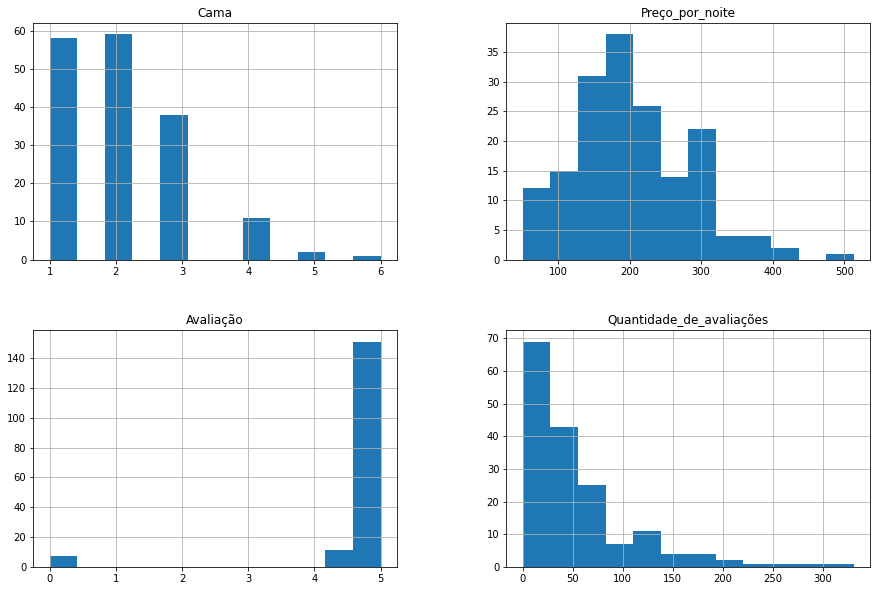

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=12, figsize=(15,10));

# Obs: df.hist(bins=12, figsize=(15,10)) é uma função do Pandas que gera histogramas para todas as colunas numéricas de um dataframe (df). O número de bins (bins=12) define o número de barras do histograma e o figsize=(15,10) define o tamanho da figura gerada. Esse comando gera um histograma para cada coluna numérica do dataframe, mostrando a distribuição dos dados.

# Identificação de outliers:

Esse código cria pontos de corte para as variáveis "Preço_por_noite" e "Avaliação" no dataframe. Ele calcula os quartis (Q1 e Q3) e o intervalo interquartil (IQR) para cada variável, e usa esses valores para calcular limites superior e inferior para cada uma delas. Os limites superior e inferior são calculados como 1.5 vezes o IQR acima e abaixo dos quartis correspondentes, respectivamente. Em seguida, ele imprime esses valores para que possam ser verificados. Esses limites superior e inferior são utilizados para identificar valores atípicos (outliers) nas variáveis.

*OBS: Outliers são valores atípicos ou anômalos em um conjunto de dados. Eles podem ser causados por erros de medição, erros de entrada de dados ou podem ser valores legítimos, mas que são significativamente diferentes dos demais valores no conjunto de dados. Identificar e lidar com outliers é importante para evitar distorções na análise e na modelagem de dados. Uma forma comum de identificar outliers é usando uma técnica chamada "boxplot" ou "regra de caixa", que utiliza a mediana, quartis e limites superior e inferior para identificar valores anômalos.*

In [ ]:
#Vamos criar um ponto de corte para os preços
q1_Preço_por_noite = df.Preço_por_noite.quantile(0.25)
q3_Preço_por_noite = df.Preço_por_noite.quantile(0.75)
IQR_Preço_por_noite = q3_Preço_por_noite - q1_Preço_por_noite
sup_Preço_por_noite = q3_Preço_por_noite + 1.5 * IQR_Preço_por_noite
inf_Preço_por_noite = q1_Preço_por_noite - 1.5 * IQR_Preço_por_noite

print(f'''Variável Preço_por_noite=> Q1={q1_Preço_por_noite},
      Q3={q3_Preço_por_noite}, 
      IQR={IQR_Preço_por_noite}, 
      Limite superior={sup_Preço_por_noite}, 
      Limite inferior={inf_Preço_por_noite}''')

#Vamos criar um ponto de corte para Avaliações
q1_Avaliação = df.Avaliação.quantile(0.25)
q3_Avaliação = df.Avaliação.quantile(0.75)
IQR_Avaliação = q3_Avaliação - q1_Avaliação
sup_Avaliação = q3_Avaliação + 1.5 * IQR_Avaliação
inf_Avaliação = q1_Avaliação - 1.5 * IQR_Avaliação

print(f'''Variável Avaliação=> Q1={q1_Avaliação}, 
    Q3={q3_Avaliação}, 
    IQR={IQR_Avaliação}, 
    Limite superior={sup_Avaliação}, 
    Limite inferior={inf_Avaliação}''')

Variável Preço_por_noite=> Q1=149.0,
      Q3=256.0, 
      IQR=107.0, 
      Limite superior=416.5, 
      Limite inferior=-11.5
Variável Avaliação=> Q1=4.72, 
    Q3=4.96, 
    IQR=0.2400000000000002, 
    Limite superior=5.32, 
    Limite inferior=4.359999999999999


# Boxplot para Preço_por_noite

Esse código usa o método "plot" do pandas para plotar um gráfico de caixa (box plot) mostrando a distribuição dos valores da coluna "Preço_por_noite" do dataframe "df". Ele também define o tamanho do gráfico como (15, 3) e desenha o eixo y vertical. Depois disso, ele imprime a quantidade de entradas no dataframe cujo valor da coluna "Preço_por_noite" é maior do que um valor especificado (sup_Preço_por_noite) e a porcentagem dessas entradas em relação ao total de entradas no dataframe.

Preço_por_noite: valores acima de 416.5:
1 entradas
0.5917%


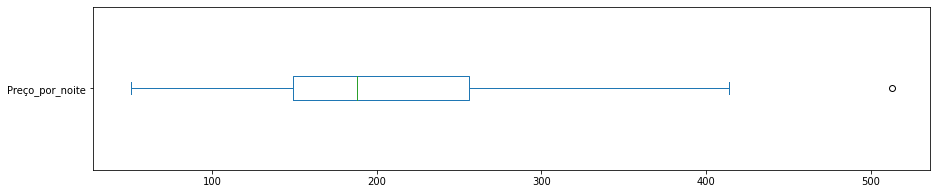

In [ ]:
df.Preço_por_noite.plot(kind='box', vert=False, figsize=(15, 3))

# ver quantidade de valores acima de sup_Preço_por_noite para Preço_por_noite
print(f"Preço_por_noite: valores acima de {sup_Preço_por_noite}:")
print(f"{len(df[df.Preço_por_noite > sup_Preço_por_noite])} entradas")
print(f"{len(df[df.Preço_por_noite > sup_Preço_por_noite])/df.shape[0]*100:.4}%")

# Boxplot para Avaliação

Ele plota um gráfico de caixa, ou box plot, para a coluna "Avaliação" do dataframe (df).

1.    O argumento "kind='box'" especifica que é um gráfico de caixa, "vert=False" indica que o eixo y deve ser horizontal e "figsize" é usado para especificar o tamanho da figura.
2.   Ele usa a notação f-string para imprimir uma mensagem indicando o número de entradas no dataframe df cuja coluna "Avaliação" é maior do que o valor atribuido a "sup_Avaliação" ou igual a zero. Ele também mostra essa quantidade em porcentagem em relação ao total de entradas no dataframe (df.shape[0]).

Avaliação: valores acima de 5.32 a valores = 0:
7 entradas
4.142%


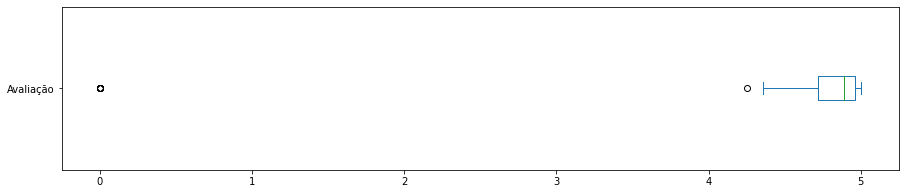

In [ ]:
df.Avaliação.plot(kind='box', vert=False, figsize=(15, 3))

# ver quantidade de valores acima de sup_minimum_nights para minimum_nights
print(f"Avaliação: valores acima de {sup_Avaliação} a valores = 0:")
print(f"{len(df[df.Avaliação > sup_Avaliação])+len(df[df.Avaliação == 0])} entradas")
print(f"{(len(df[df.Avaliação > sup_Avaliação])+len(df[df.Avaliação == 0])) / df.shape[0]*100:.4}%")

# Tratamento 

Este código tem como objetivo remover os outliers (valores atípicos) da coluna "Preço_por_noite" em um dataframe chamado "df". Ele faz isso utilizando o método de "Interquartile Range (IQR)", que é uma medida de dispersão estatística. Em primeiro lugar, ele calcula o primeiro quartil (q1), o terceiro quartil (q3) e o valor de IQR (q3-q1). Em seguida, ele calcula os limites inferiores e superiores (lower_bound e upper_bound) utilizando esses valores. Em seguida, ele remove todas as linhas cujos valores na coluna "Preço_por_noite" estão fora desses limites.
Em seguida, ele calcula a mediana da coluna "Preço_por_noite" e substitui os valores acima do limite superior pela mediana calculada. Por fim, ele gera um boxplot para visualizar a distribuição dos dados da coluna "Preço_por_noite" após a remoção dos outliers. O comando sns.boxplot é usado para gerar o gráfico e plt.title, plt.xlabel, plt.ylabel são usados para colocar título e nome nos eixos.

In [ ]:
q1 = df['Preço_por_noite'].quantile(0.25)
q3 = df['Preço_por_noite'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df = df[(df['Preço_por_noite'] > lower_bound) & (df['Preço_por_noite'] < upper_bound)]

In [ ]:
median = df['Preço_por_noite'].median()
df['Preço_por_noite'] = np.where(df['Preço_por_noite'] > upper_bound, median, df['Preço_por_noite'])

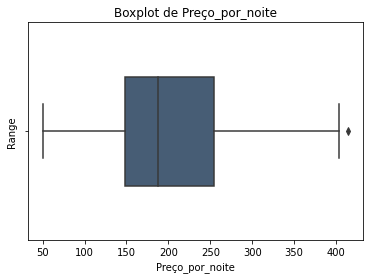

In [ ]:
#Boxplot minimun_nights após retirar outliers
sns.boxplot(x=df['Preço_por_noite'], color='#3F5D7D', linewidth=1.5, width=0.5, fliersize=5, whis=1.5)
plt.title('Boxplot de Preço_por_noite')
plt.xlabel('Preço_por_noite')
plt.ylabel('Range')
plt.show()

Essa célula a seguir cria uma cópia do DataFrame original chamada "df_clean" e então seleciona os índices das linhas onde o valor da coluna "Preço_por_noite" é maior que "sup_Preço_por_noite". Isso é feito utilizando o método de seleção booleana e o método "index" para selecionar somente os índices das linhas selecionadas.

In [ ]:
df_clean = df.copy()
df_clean[df_clean.Preço_por_noite > sup_Preço_por_noite].index

Int64Index([], dtype='int64')

Esse código faz uma cópia do DataFrame original (df) para uma nova variável chamada df_clean. Em seguida, utiliza o método drop() para remover linhas do DataFrame onde o valor da coluna "Preço_por_noite" é maior que sup_Preço_por_noite e onde é igual a zero. Além disso, remove linhas onde o valor da coluna "Avaliação" é maior que sup_Avaliação. Por fim, plota um histograma dos dados limpando.

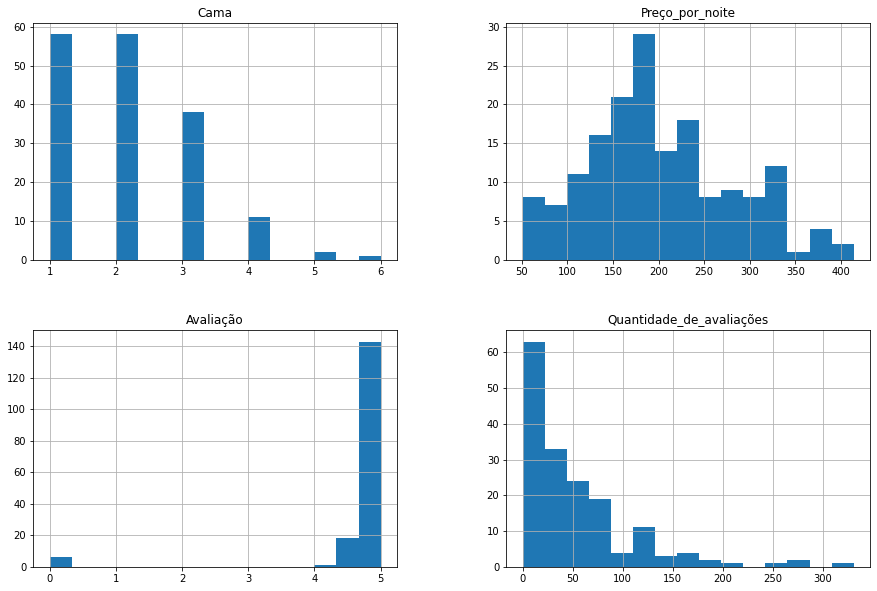

In [ ]:
#Eliminando linhas com outlayers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Preço_por_noite > sup_Preço_por_noite].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.Preço_por_noite == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.Avaliação > sup_Avaliação].index, axis=0, 
              inplace=True)

# Histograma após limpeza dos dados
df_clean.hist(bins=15, figsize=(15,10));

Esse código cria um boxplot do atributo "Preço_por_noite" do DataFrame "df_clean", após as linhas com outliers terem sido removidas. O método "plot" é usado para criar o gráfico, e o argumento "kind" é usado para especificar o tipo de gráfico (neste caso, boxplot). O argumento "vert" é usado para especificar se o eixo x deve ser vertical (False) ou horizontal (True). O argumento "figsize" é usado para especificar o tamanho do gráfico. O mesmo se repete com a coluna "Avaliação".

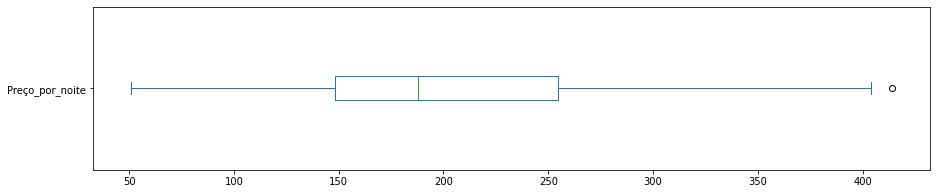

In [ ]:
#Boxplot Preço_por_noite após retirar outliers
df_clean.Preço_por_noite.plot(kind='box', vert=False, figsize=(15, 3));

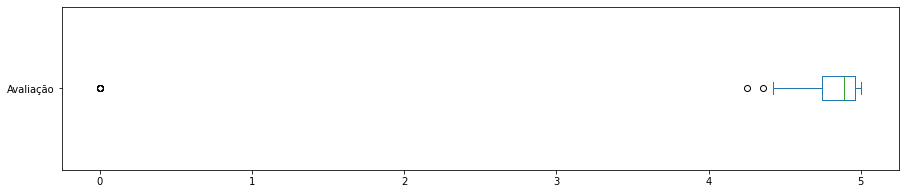

In [ ]:
#Boxplot Avaliação após retirar outliers
df_clean.Avaliação.plot(kind='box', vert=False, figsize=(15, 3));

# **Análise dos Dados**

# Tipos de imóveis:

Essa célula mostra a contagem de ocorrências de cada valor na coluna "Tipo" do DataFrame df_clean. É uma forma de verificar quantas vezes cada tipo de imóvel se repete no conjunto de dados limpo. Ele retorna um objeto "Series" com os tipos de imóveis como índices e suas respectivas contagens como valores.

In [ ]:
# mostrar quantas vezes a descrição do imóvel se repete
df_clean.Tipo.value_counts()

Suíte a 1 Minuto da Praia de Manaíra                                                    2
Apto com ótima área de lazer e localização (909)                                        2
Novo, completo e Luxuoso! Viagem de IDA #01                                             2
Apartamento aconchegante com 01 quarto, próximo a Orla de Manaira - João Pessoa - PB    2
Flat a beira mar                                                                        2
                                                                                       ..
Duas suítes em prédio frente mar! Bem decorado!                                         1
Flat à 200 mts da Praia do Bessa com Área Completa                                      1
Espetacular flat de frente para o mar com Piscina!                                      1
Confortável e econômico! (com ar condicionado)                                          1
Israel Flat Tambaú                                                                      1
Name: Tipo

Esse código mostra quantos imóveis há em cada localização de João Pessoa no DataFrame "df_clean". Ele usa o método "value_counts()" para contar quantas vezes cada valor aparece na coluna "Local" do DataFrame e mostra os resultados.

In [ ]:
# mostrar quantos imóveis há em cada localização
df_clean.Local.value_counts()

Apartamento em João Pessoa                 37
Apartamento em Cabo Branco                 36
Apartamento em Manaíra                     21
Apartamento em Tambaú                      19
Apartamento em Jardim Oceania              10
Quarto inteiro em João Pessoa               7
Quarto inteiro em Jardim Oceania            4
Condomínio em João Pessoa                   4
Apartamento em Bessa                        3
Quarto inteiro em Manaíra                   3
Apartamento em Loteamento Bela Vista        2
Apartamento em Intermares                   2
Suíte de hóspedes em João Pessoa            1
Apartamento em Cabedelo                     1
Loft em João Pessoa                         1
Quarto inteiro em Cabedelo                  1
Apartamento em Gramame                      1
Condomínio em Intermares                    1
Condomínio em Tambaú                        1
Condomínio em Cabo Branco                   1
Loft em Jardim Oceania                      1
Lugar para ficar em Cabo Branco   

In [ ]:
# df_Local = Local_acomodacao = (df_clean.Local.value_counts()/df_clean.shape[0]*100).sort_values(ascending=False)

# df_primeiros_13 = df_Local.head(13)

# fig, ax = plt.subplots(figsize=(10,6))
# Local_acomodacao = ax.pie(df_primeiros_13['Porcentagem'],
#                          labels = df_primeiros_13['Local_Acomodacao'])

# ax.set_title("Preço por tipo de localização (%)")
# plt.tight_layout()

Essa célula faz uma análise estatística da coluna "Avaliação" do DataFrame df_clean. Ele primeiramente conta quantas vezes cada valor de avaliação aparece no conjunto de dados e divide esses valores pelo número total de linhas no DataFrame (df_clean.shape[0]) para obter a porcentagem de ocorrência de cada valor de avaliação. Em seguida, esses valores são ordenados em ordem decrescente (ascending=False).
Depois, é criado um novo DataFrame com as colunas 'Avaliação' e 'Local' e adicionando as chaves e valores das avaliações e suas porcentagens calculadas anteriormente.
Em seguida, é selecionado os 100 primeiros valores do DataFrame e é criado um gráfico de barra para visualizar a quantidade de avaliações por valor da noite em porcentagem.

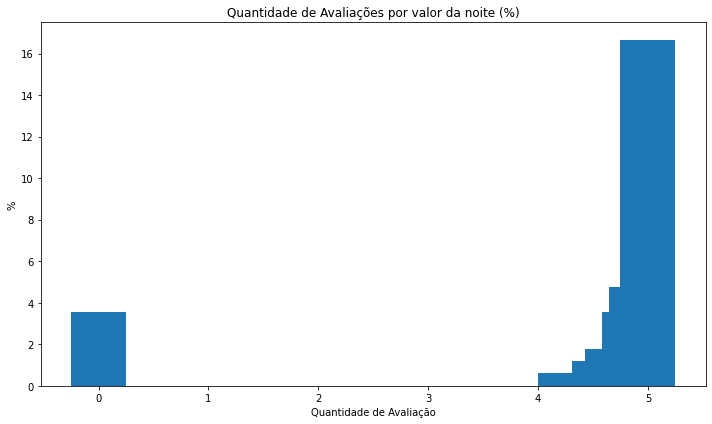

In [ ]:
Avaliação = (df_clean.Avaliação.value_counts()/df_clean.shape[0]*100).sort_values(ascending=False)

df_Avaliação = pd.DataFrame([Avaliação.keys(),Avaliação.values]).transpose()
df_Avaliação.columns=['Avaliação','Local']

# Pegando as 100 maiores avaliações
df_Avaliação = df_Avaliação.head(100)

fig, ax = plt.subplots(figsize=(10,6))
Avaliação = ax.bar(df_Avaliação['Avaliação'],
                         df_Avaliação['Local'],0.5, label = 'Local')

ax.set_title("Quantidade de Avaliações por valor da noite (%)")
ax.set_xlabel("Quantidade de Avaliação")
ax.set_ylabel("%")

plt.tight_layout() 


Esta célula cria um scatter plot (gráfico de dispersão) mostrando a relação entre Preço_por_noite e Local para as 100 linhas com os maiores valores de Preço_por_noite no dataframe df_clean. Ele cria uma nova variável, df_top_100, que é uma cópia dos primeiros 100 valores classificados do dataframe df_clean pelo Preço_por_noite. Ele cria então um gráfico de dispersão, onde o eixo x é o valor do Local, o eixo y é o valor do Preço_por_noite, e a cor dos pontos representa o valor do Preço_por_noite. Ele também adiciona título, rótulos para os eixos x e y e ajusta o layout do gráfico.

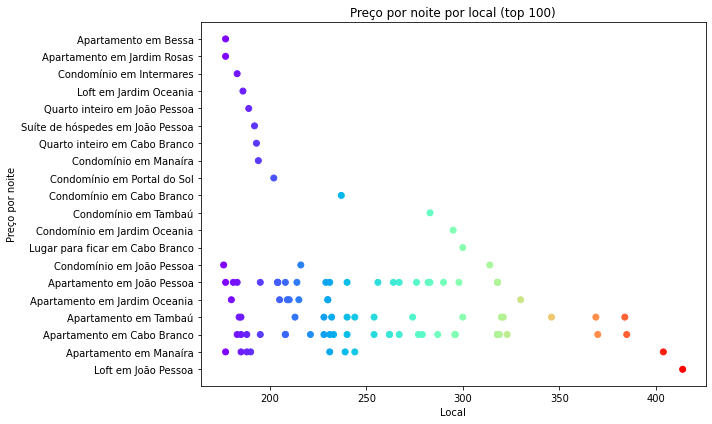

In [ ]:
df_top_100 = df_clean.sort_values(by='Preço_por_noite', ascending=False).head(100)

fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(df_top_100['Preço_por_noite'], df_top_100['Local'], c=df_top_100['Preço_por_noite'], cmap='rainbow')
ax.set_title('Preço por noite por local (top 100)')
ax.set_xlabel('Local')
ax.set_ylabel('Preço por noite')
plt.tight_layout() 


In [ ]:
# Este código agrupa os dados por 'Local' e calcula a média do preço por noite. 
# Então, esses valores de média são classificados em ordem. 
# Isso mostra qual é a média do preço por noite em cada local do conjunto de dados.

df_clean.groupby('Local').Preço_por_noite.mean().sort_values(ascending=False)

Local
Loft em João Pessoa                        414.000000
Lugar para ficar em Cabo Branco            300.000000
Condomínio em Jardim Oceania               295.000000
Condomínio em Tambaú                       283.000000
Apartamento em Tambaú                      246.473684
Apartamento em Cabo Branco                 243.194444
Condomínio em Cabo Branco                  237.000000
Apartamento em João Pessoa                 212.567568
Condomínio em João Pessoa                  211.500000
Apartamento em Jardim Oceania              208.200000
Condomínio em Portal do Sol                202.000000
Condomínio em Manaíra                      194.000000
Quarto inteiro em Cabo Branco              193.000000
Suíte de hóspedes em João Pessoa           192.000000
Loft em Jardim Oceania                     186.000000
Condomínio em Intermares                   183.000000
Apartamento em Manaíra                     178.000000
Apartamento em Jardim Rosas                177.000000
Quarto inteiro em Lote

Essa célula é a visualização em gráfico da célula acima, fazendo três coisas:

1. Ele está agrupando os dados do DataFrame "df_clean" por "Local" e calculando a média do preço por noite para cada grupo. O resultado é armazenado em uma nova variável chamada "df_grouped".
2. Ele está criando um gráfico de barras com base no DataFrame "df_grouped" utilizando a função "plot()" e especificando o tipo de gráfico como "bar". Ele está também adicionando rótulos para o eixo x e y.
3. Ele está adicionando um título para o gráfico e exibindo-o na tela utilizando a função "title()" e "show()" respectivamente.

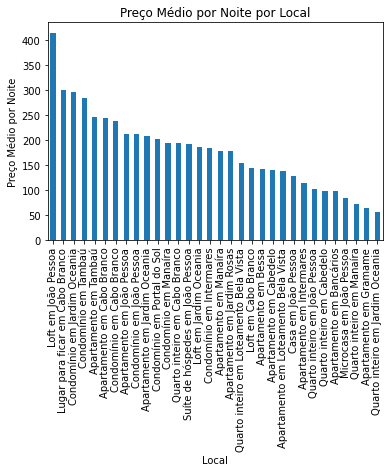

In [ ]:
# Agrupar os dados por Local e calcular a média de Preço_por_noite
df_grouped = df_clean.groupby('Local').Preço_por_noite.mean().sort_values(ascending=False)

# Criar o gráfico de barras
df_grouped.plot(kind='bar', xlabel='Local', ylabel='Preço Médio por Noite')

# Adicionar título ao gráfico
plt.title('Preço Médio por Noite por Local')

# Exibir o gráfico
plt.show()

In [ ]:
# Ver a média da coluna `Cama`.
# Esse código calcula a média dos valores da coluna "Cama" do DataFrame "df_clean".

df_clean.Cama.mean()

2.0714285714285716

Esse código cria um gráfico 3D com base em três colunas do dataframe "df": Preço_por_noite, Cama, e Avaliação. Ele seleciona as 90 linhas com os maiores valores dessas colunas, converte a coluna Preço_por_noite para um tipo numérico, define as cores dos pontos no gráfico com base na coluna Avaliação, e adiciona rótulos para as três dimensões. Ele utiliza a biblioteca matplotlib para plotar o gráfico e plt.show() para exibir o gráfico.

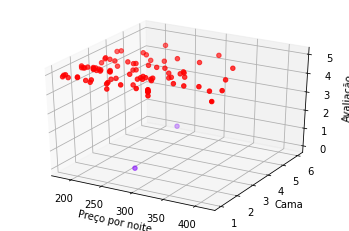

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from IPython.display import set_matplotlib_formats

df = df.nlargest(90, ['Preço_por_noite', 'Cama', 'Avaliação'])
fig = plt.figure()
ax.grid(True)

ax.set_xscale('log')
ax = fig.add_subplot(111, projection='3d')
df.Preço_por_noite = pd.to_numeric(df.Preço_por_noite, errors='coerce')
highest_price = df.nlargest(1, 'Preço_por_noite')
# ax.annotate("ponto especifico", xy=(highest_price['Preço_por_noite'], highest_price['Cama']), xytext=(0.8, 0.95), textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05))
colors = cm.rainbow(df['Avaliação'])
ax.scatter(df['Preço_por_noite'], df['Cama'], df['Avaliação'], c=colors)

ax.set_xlabel('Preço por noite')
ax.set_ylabel('Cama')
ax.set_zlabel('Avaliação')
plt.show()


Essa célula ordena o dataframe "df" pela coluna "Avaliação" em ordem crescente, e então usa a biblioteca plotly express (px) para criar um gráfico de dispersão (scatter plot) que mostra a relação entre o preço por noite e a quantidade de avaliações. O tamanho dos pontos no gráfico é determinado pela coluna "Quantidade de avaliações", e a cor dos pontos é determinada pela mesma coluna. O eixo x está em escala logarítmica, e o gráfico tem limites definidos para o eixo x e y. O título do gráfico é "Relação entre preço por noite e quantidade de avaliações" e os rótulos dos eixos são "Preço por noite" e "Quantidade de avaliações". Por fim, o comando "fig.show()" exibe o gráfico.

In [ ]:
df = df.sort_values(by='Avaliação', ascending=False) # ordena o dataframe pela coluna Avaliação

fig = px.scatter(df, x='Preço_por_noite', y='Quantidade_de_avaliações',
                 size='Quantidade_de_avaliações', color='Quantidade_de_avaliações',
                 labels={'Preço_por_noite':'Preço por noite', 'Quantidade_de_avaliações':'Quantidade de avaliações'},
                 title='Relação entre preço por noite e quantidade de avaliações',
                 log_x=True,
                 range_x=[50,1000],
                 range_y=[50,100])
fig.show()

Essa célula cria um gráfico de barras horizontais (barh) que mostra a quantidade de avaliações para cada local específico. Ele começa importando a biblioteca matplotlib.pyplot como plt, depois cria uma cópia do dataframe "df" ordenado pelo número de avaliações. Ele então obtém os valores das colunas "Local" e "Quantidade_de_avaliações" e armazena-os nas variáveis locations e review_counts respectivamente. Em seguida, plt.barh é usado para criar o gráfico de barras horizontais, onde as barras são traçadas usando os valores de locations no eixo y e review_counts no eixo x e color é especificado como green. Labels são adicionados ao eixo x e y com plt.xlabel e plt.ylabel e plt.show é usado para exibir o gráfico.

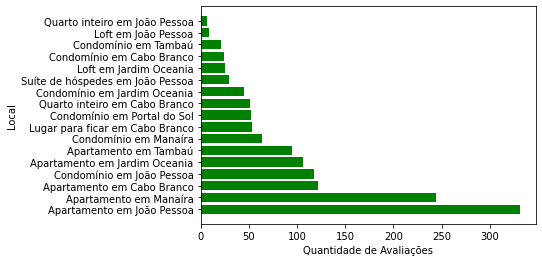

In [ ]:
import matplotlib.pyplot as plt

# Suponha que você tenha um dataframe chamado df com as colunas "Local" e "Quantidade_de_avaliações"

df = df.sort_values(by='Quantidade_de_avaliações', ascending=False) # ordena o dataframe pelo número de avaliações

locations = df['Local'].values
review_counts = df['Quantidade_de_avaliações'].values

plt.barh(locations, review_counts, color='green') # adiciona o argumento color para especificar a cor
plt.ylabel('Local')
plt.xlabel('Quantidade de Avaliações')
plt.show()


Este código cria um gráfico de distribuição usando a biblioteca plotly express (px) e dataframe (df) passado como argumento. O gráfico mostra a relação entre o preço por noite e a quantidade de avaliações de cada tipo de acomodação. O eixo x é representado pelo preço por noite, o eixo y é representado pela quantidade de avaliações e o gráfico é colorido de acordo com o tipo de acomodação. O título do gráfico é "Preço x quantidade de estimativas por tipo de acomodação". O código específico que somente os 30 maiores valores para "Preço_por_noite" deve ser exibido no gráfico. Quando o comando "fig.show()" é executado, o gráfico é exibido.

In [ ]:
import plotly.express as px

df = df.sort_values('Preço_por_noite',ascending=False)
df_top30 = df.head(30)
fig = px.scatter(df_top30, x='Preço_por_noite', y='Quantidade_de_avaliações', color='Tipo', labels={'Preço_por_noite':'Preço por noite', 'Quantidade_de_avaliações':'Quantidade de estimativas'}, title='Preço x quantidade de avaliações por tipo de acomodação')
fig.show()

In [ ]:
# Selecionando os 30 maiores e os 30 menores valores para Preço_por_noite
top30_highest_prices = df.nlargest(30, 'Preço_por_noite')
top30_lowest_prices = df.nsmallest(30, 'Preço_por_noite')

# Criando o gráfico
fig = px.bar(data_frame=top30_highest_prices, x='Local', y='Preço_por_noite', color='Preço_por_noite',
             title='30 Maiores preços por noite para as acomodações no Airbnb de João Pessoa', labels={'Local':'Local', 'Preço_por_noite':'Preço por noite'},
             color_continuous_scale='Viridis')
fig.show()

In [ ]:
fig = px.bar(data_frame=top30_lowest_prices, x='Local', y='Preço_por_noite', color='Preço_por_noite',
             title='30 Menores preços por noite para as acomodações no Airbnb de João Pessoa', labels={'Local':'Local', 'Preço_por_noite':'Preço por noite'},
             color_continuous_scale='Viridis')
fig.show()

Para criar um gráfico de linha que relacione os valores de Local e Preço_por_noite com a coluna Avaliação, você pode utilizar o método line() do plotly e passar as colunas desejadas como argumentos. Além disso, é importante especificar o eixo x e o eixo y para que o gráfico seja construído corretamente.

Esse código irá criar um gráfico de linha com os 30 maiores e os 30 menores valores para Preço_por_noite relacionados com a coluna Avaliação. O gráfico irá mostrar a relação entre o preço por noite e o local em que a acomodação está localizada, e como essa relação varia de acordo com a avaliação dada para a acomodação.

In [ ]:
# Selecionando os 30 maiores e os 30 menores valores para Preço_por_noite
df_top_30 = df.nlargest(30, 'Preço_por_noite')
df_bottom_30 = df.nsmallest(30, 'Preço_por_noite')

# Criando o gráfico de barra
fig = px.bar(df_top_30, x='Local', y='Preço_por_noite', color='Avaliação', title='Preço por noite x Local (top 30)')
fig.add_trace(px.bar(df_bottom_30, x='Local', y='Preço_por_noite', color='Avaliação').data[0])
fig.show()

## Conclusões

**• Artigo com a análise:** https://docs.google.com/document/d/1vomnAn2nRHk15gYf5yZEhdzAy8rzJTCwp684Xn5KF04/edit?usp=sharing
---

---

A análise realizada neste trabalho permitiu obter uma visão geral das acomodações disponíveis no Airbnb em João Pessoa. É importante destacar que a quantidade de avaliações das acomodações é variável, o que pode influenciar na confiabilidade das avaliações.

A coleta e análise de dados realizadas neste trabalho contribuíram para uma compreensão mais completa das acomodações disponíveis no Airbnb em João Pessoa, e pode ser útil para quem está planejando viajar para a cidade e procurando por opções de hospedagem. Além disso, este trabalho pode ser considerado como um portfólio para futuras oportunidades de trabalho ou estudo na área de análise de dados.

---
Em conclusão, este trabalho apresentou uma análise e coleta de dados para o mercado de acomodações do Airbnb em João Pessoa. Utilizando técnicas de limpeza e manipulação de dados, foi possível identificar tendências e padrões nos dados coletados. Além disso, foi possível entender a dinâmica do mercado de acomodações em João Pessoa e identificar oportunidades para os proprietários de acomodações e para os viajantes.

Gostariamos de agradecer ao professor de Tópicos especiais em informática, Alexsandro Trindade, pelo apoio e orientação durante todo o desenvolvimento deste trabalho, sem o qual ele não teria sido possível. Este trabalho serve como um portfólio do meu conhecimento e habilidades em coleta e análise de dados e espero que possa ser útil em nossas carreiras futuras.